In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# %config InlineBackend.figure_format='retina'

In [160]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.4.2
numpy   version = 1.22.3
seaborn version = 0.11.2


In [161]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [162]:
# การดูข้อมูลคอลัมน์ Outcome
d = df['Outcome'].unique()
d

array([1, 0], dtype=int64)

การอธิบายความหมายในแต่ละคอลัมน์
1) Pregnancies:จำนวนครั้งที่ตั้งครรภ์
2) Glucose: กลูโคส
3) BloodPressure: ความดันโลหิต
4) SkinThickness: ความหนาของผิวหนัง
5) Insuline: อินซูลิน
6) BMI: ดัชนีมวลกาย (น้ำหนักเป็นกิโลกรัม/(ส่วนสูงเป็นเมตร)^2)
7) DiabetesPedigreeFunction: ตรวจหาแนวโน้มการเป็นเบาหวาน
8) Age: อายุ
9) Outcome: ผลลัพธ์ ตัวแปรคลาส (0: ไม่เป็นเบาหวาน, 1: เป็นเบาหวาน)

การแปลงตัวเลขให้เป็นตัวอักษร เช่น 0 เป็น 'No' คือไม่เป็นเบาหวาน, 1 เป็น 'Yes' คือเป็นเบาหวาน

In [129]:
# #Label Encoding: การแปลงตัวอักษรให้เป็นตัวเลข
# class_names, y = np.unique(df['Outcome'], return_inverse=True)
# class_names
# y

# import numpy as np
# df['Outcome'] = np.where(df['Outcome']==0, 'No', 'Yes')

target_map = {0: 'No_Diabetes', 1: 'Diabetes'}
df['Outcome'] = df['Outcome'].map(target_map)

df.sample(5,random_state=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
285,7,136,74,26,135,26.0,0.647,51,No_Diabetes
101,1,151,60,0,0,26.1,0.179,22,No_Diabetes
581,6,109,60,27,0,25.0,0.206,27,No_Diabetes
352,3,61,82,28,0,34.4,0.243,46,No_Diabetes
726,1,116,78,29,180,36.1,0.496,25,No_Diabetes


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [134]:
X = df.iloc[:,:-1] #.values 
y = df.iloc[:,-1] #.values 

In [135]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [136]:
y

0         Diabetes
1      No_Diabetes
2         Diabetes
3      No_Diabetes
4         Diabetes
          ...     
763    No_Diabetes
764    No_Diabetes
765    No_Diabetes
766       Diabetes
767    No_Diabetes
Name: Outcome, Length: 768, dtype: object

In [144]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [145]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [146]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [147]:
y_train 

60     No_Diabetes
618       Diabetes
346    No_Diabetes
294    No_Diabetes
231       Diabetes
          ...     
71     No_Diabetes
106    No_Diabetes
270       Diabetes
435       Diabetes
102    No_Diabetes
Name: Outcome, Length: 614, dtype: object

In [148]:
y_test 

668    No_Diabetes
324    No_Diabetes
624    No_Diabetes
690    No_Diabetes
473    No_Diabetes
          ...     
355       Diabetes
534    No_Diabetes
344    No_Diabetes
296       Diabetes
462    No_Diabetes
Name: Outcome, Length: 154, dtype: object

StandardScaler คือการแปลงสเกลข้อมูล Features (คุณสมบัติ) ที่มีหน่วยวัดแตกต่างกัน ให้มีสเกลหน่วยวัดเหมือนกัน เช่น บางข้อมูลมีหน่วยวัดเป็น กิโลเมตร เมตร เซนติเมตร หรือบาท เป็นต้น ดังนั้นการกำหนดสเกลให้เหมือนกัน โดยการปรับให้ค่าเฉลี่ย (Mean) เท่ากับ 0 และค่าเบี่ยงแบนมาตรฐาน (Standard Deviation: SD) เท่ากับ 1 ตาม coding ดังต่อไปนี้

In [157]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print('\nX_train\n', X_train, '\n\n\nX_test\n', X_test)


X_train
 [[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]] 


X_test
 [[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816
   0.53008521]]


In [152]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

print('Accuracy is', model.score(X_test, y_test)*100, '%')

Accuracy is 75.32467532467533 %


In [153]:
y_predict.reshape(-1, 1)

array([['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes'],
       ['No_Diabetes'],
       ['Diabetes'],
       ['No_Diabetes']

In [154]:
# การประเมินโมเดล
accuracy = model.score(X_test, y_test).round(2)
print('Test accuracy:', accuracy)

Test accuracy: 0.75


In [155]:
class_names = df['Outcome'].unique()
class_names

array(['Diabetes', 'No_Diabetes'], dtype=object)

##### การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น Yes: เป็นเบาหวาน หรือ No: ไม่เป็นเบาหวาน

Accuracy Score: 0.75
              precision    recall  f1-score   support

    Diabetes       0.65      0.65      0.65        55
 No_Diabetes       0.81      0.81      0.81        99

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[[36 19]
 [19 80]]


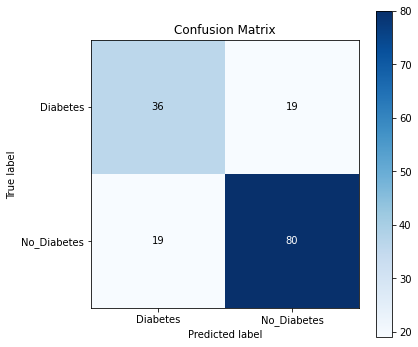

In [156]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_predict, target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

การประเมินโมเดลด้วย confusion matrix ในกรณีที่ class เป็น 0: เป็นเบาหวาน หรือ 1: ไม่เป็นเบาหวาน

In [107]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# #การประเมินโมเดลที่เป็นตาราง
# confusion_matrix = confusion_matrix(y_test, y_predict)
# print("confusion_matrix\n", confusion_matrix)
# print(classification_report(y_test, y_predict))

# #การประเมินโมเดลที่เป็นรูปสี
# # actual = numpy.random.binomial(1,.9,size = 1000)
# # predicted = numpy.random.binomial(1,.9,size = 1000)
# confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
# cm_display.plot()
# plt.show()

การวินิจฉัยเบาหวานในสตรีมีครรภ์

In [38]:
Pregnancies = float(input("Enter Pregnancies: "))
Glucose = float(input("Enter Glucose: "))
BloodPressure = float(input("Enter Blood Pressure: "))
SkinThickness = float(input("Enter Skin Thickness: "))
Insuline = float(input("Enter Insuline: "))
BMI = float(input("Enter BMI: "))
DiabetesPedigreeFunction = float(input("Enter Diabetes Pedigree Function: "))
Age = float(input("Enter Age: "))

In [39]:
result = model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insuline, BMI, DiabetesPedigreeFunction, Age]])
print("ผลการวินิจฉัยพบว่า:", result, "0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน")

c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ผลการวินิจฉัยพบว่า: [1] 0 = ไม่เป็นเบาหวาน, 1 = เป็นเบาหวาน


##### การบันทึกโมเดลไปพัฒนาบนระบบดิจิทัลด้วย Python Django 

วิธีที่ 1

In [99]:
#https://www.youtube.com/watch?v=rNhVBv0i4os
# วิธีที่ 1

from joblib import dump
dump(model, 'model_logis.joblib')

['model_logis.joblib']

วิธีที่ 2

In [100]:
from pandas import read_csv

#Pickle model 
pd.to_pickle(model, 'model_logis.pickle')

#Unpickle model 
model = pd.read_pickle('model_logis.pickle')

วิธีที่ 3

In [41]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'random_model.pkl')
model = joblib.load('random_model.pkl')

วิธีที่ 4

In [40]:
# save the model to disk
import joblib 
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']